In [9]:
import scanpy as sc
import surgeon
import numpy as np

In [2]:
sc.settings.set_figure_params(dpi=200)

In [17]:
condition_key = "study"
cell_type_key = 'cell_type'
target_conditions = ["Tabula_muris", "Zeisel"]
target_cell_types = ["endothelial cell"]

# Loading mouse brain datasets and data preparation

In [4]:
adata = sc.read("./data/mouse_brain/mouse_brain_regions.h5ad")
adata

AnnData object with n_obs × n_vars = 978734 × 14858 
    obs: 'Age', 'Subclass', 'Taxonomy_group', 'Tissue', 'age', 'batch', 'cell_ontology_class', 'cell_ontology_id', 'cell_type', 'class', 'cluster', 'cluster_id', 'louvain', 'reason', 'refined_class', 'region', 'region_subcluster', 'sample_type', 'study', 'subcluster'

In [5]:
adata.X.min(), adata.X.max()

(0.0, 824247.0)

In [10]:
subset = adata[np.random.choice(adata.shape[0], int(0.05 * adata.shape[0]), replace=False), :]
subset

View of AnnData object with n_obs × n_vars = 48936 × 14858 
    obs: 'Age', 'Subclass', 'Taxonomy_group', 'Tissue', 'age', 'batch', 'cell_ontology_class', 'cell_ontology_id', 'cell_type', 'class', 'cluster', 'cluster_id', 'louvain', 'reason', 'refined_class', 'region', 'region_subcluster', 'sample_type', 'study', 'subcluster'

In [14]:
adata = surgeon.utils.normalize(subset, 
                                 filter_min_counts=False, 
                                 normalize_input=False, 
                                 size_factors=True,
                                 logtrans_input=True,
                                 n_top_genes=1000,
                                )
adata

AnnData object with n_obs × n_vars = 48936 × 1000 
    obs: 'Age', 'Subclass', 'Taxonomy_group', 'Tissue', 'age', 'batch', 'cell_ontology_class', 'cell_ontology_id', 'cell_type', 'class', 'cluster', 'cluster_id', 'louvain', 'reason', 'refined_class', 'region', 'region_subcluster', 'sample_type', 'study', 'subcluster', 'n_counts', 'size_factors'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'study_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

## Number of cells in each batch

In [15]:
adata.obs[condition_key].value_counts()

Saunders        34590
Zeisel           7432
Rosenberg        6546
Tabula_muris      368
Name: study, dtype: int64

In [16]:
adata.obs.groupby([cell_type_key,condition_key ]).size()

cell_type                       study       
astrocyte                       Rosenberg         574
                                Saunders         2792
                                Tabula_muris       21
                                Zeisel           1019
brain pericyte                  Rosenberg          68
                                Saunders          593
                                Tabula_muris        4
                                Zeisel            250
endothelial cell                Rosenberg          16
                                Saunders         2316
                                Tabula_muris       33
                                Zeisel            368
ependymal cell                  Rosenberg          18
                                Saunders          102
                                Zeisel             64
macrophage                      Rosenberg           3
                                Saunders           92
                                Tabul

## visualization  of the original data

In [12]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


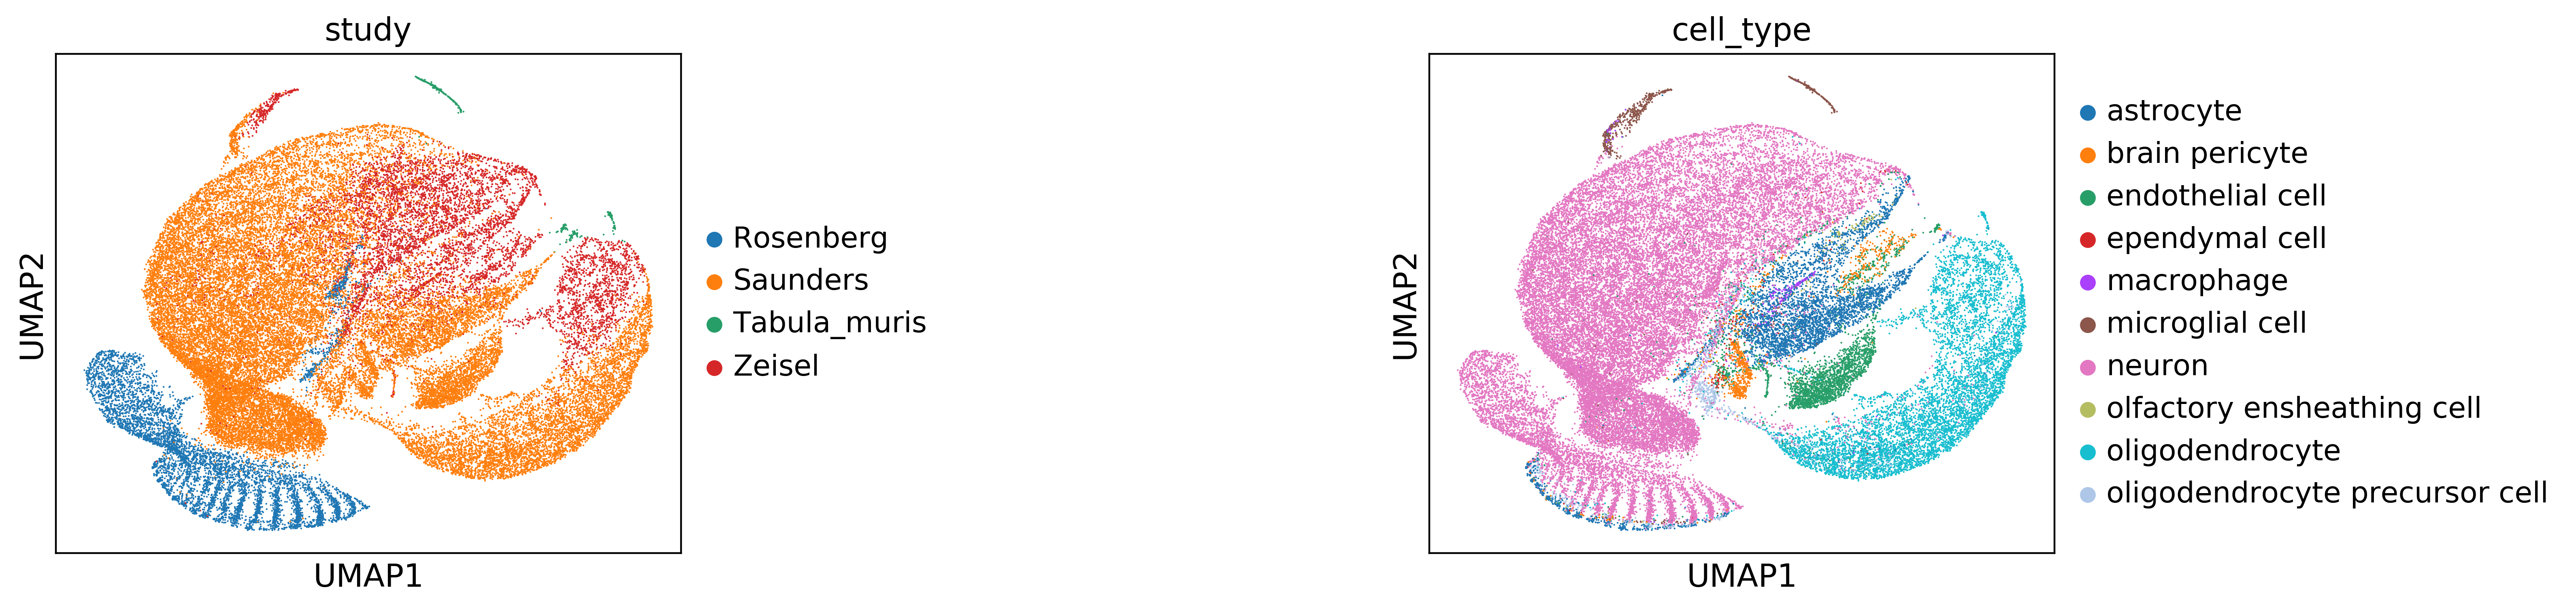

In [13]:
sc.pl.umap(adata, color=[condition_key, cell_type_key], wspace=1.0)

In [ ]:
adata.write_h5ad("./data/mouse_brain/mouse_brain_umap_normalized.h5ad")

## Now we leave out one study  (10X_v3) for training the newtork

In [19]:
adata_for_training = adata[~adata.obs[condition_key].isin(target_conditions)]
adata_for_training

View of AnnData object with n_obs × n_vars = 41136 × 1000 
    obs: 'Age', 'Subclass', 'Taxonomy_group', 'Tissue', 'age', 'batch', 'cell_ontology_class', 'cell_ontology_id', 'cell_type', 'class', 'cluster', 'cluster_id', 'louvain', 'reason', 'refined_class', 'region', 'region_subcluster', 'sample_type', 'study', 'subcluster', 'n_counts', 'size_factors'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'study_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

In [20]:
adata_for_training = adata_for_training[~adata_for_training.obs[cell_type_key].isin(target_cell_types)]
adata_for_training

View of AnnData object with n_obs × n_vars = 38804 × 1000 
    obs: 'Age', 'Subclass', 'Taxonomy_group', 'Tissue', 'age', 'batch', 'cell_ontology_class', 'cell_ontology_id', 'cell_type', 'class', 'cluster', 'cluster_id', 'louvain', 'reason', 'refined_class', 'region', 'region_subcluster', 'sample_type', 'study', 'subcluster', 'n_counts', 'size_factors'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'study_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

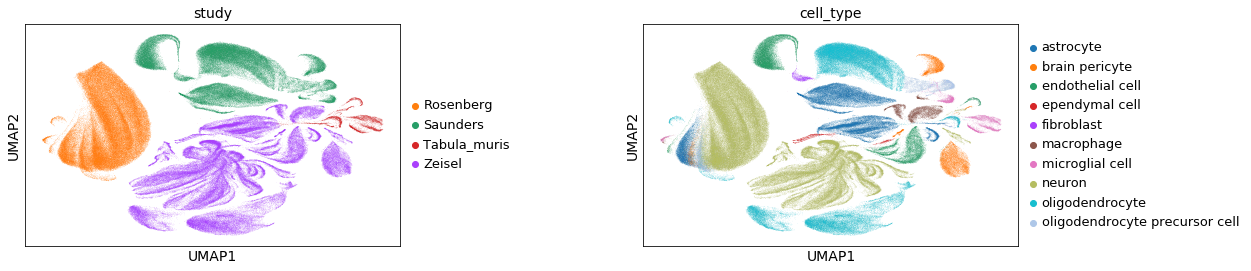

In [23]:
sc.pl.umap(adata_for_training, color=[condition_key, cell_type_key], wspace=0.5)

In [21]:
adata_out_of_sample = adata[adata.obs[condition_key].isin(target_conditions)]
adata_out_of_sample

View of AnnData object with n_obs × n_vars = 7800 × 1000 
    obs: 'Age', 'Subclass', 'Taxonomy_group', 'Tissue', 'age', 'batch', 'cell_ontology_class', 'cell_ontology_id', 'cell_type', 'class', 'cluster', 'cluster_id', 'louvain', 'reason', 'refined_class', 'region', 'region_subcluster', 'sample_type', 'study', 'subcluster', 'n_counts', 'size_factors'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'study_colors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

## Train/Test Split

In [22]:
train_adata, valid_adata = surgeon.utils.train_test_split(adata_for_training, 0.85)

In [23]:
train_adata.shape, valid_adata.shape

((32983, 1000), (5821, 1000))

In [24]:
n_conditions = len(train_adata.obs[condition_key].unique().tolist())

# Create & Train model with training data

In [25]:
network = surgeon.archs.CVAE(x_dimension=train_adata.shape[1], 
                             z_dimension=20,
                             n_conditions=n_conditions,
                             lr=0.001,
                             alpha=0.001,
                             eta=1.0,
                             clip_value=5.0,
                             loss_fn='nb',
                             model_path="./models/CVAE/mouse_brain/",
                             dropout_rate=0.2,
                             output_activation='relu')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 1000)         0                                            
__________________________________________________________________________________________________
encoder_labels (InputLayer)     (None, 2)            0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 1002)         0           data[0][0]                       
                                                                 encoder_labels[0][0]             
_____________________

/home/mohsen/scnet/surgeon/models/_cvae.py:143: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  output=h_disp)


## We assign each study to a numerical label 

In [26]:
train_adata.obs[condition_key].value_counts()

Saunders     27419
Rosenberg     5564
Name: study, dtype: int64

In [29]:
conditions = adata.obs[condition_key].unique().tolist()
condition_encoder = surgeon.utils.create_dictionary(conditions, target_conditions)
condition_encoder

{'Saunders': 0, 'Rosenberg': 1}

## Training the network

In [ ]:
network.train(train_adata,
              valid_adata, 
              condition_key=condition_key,
              le=condition_encoder, 
              n_epochs=10000,
              batch_size=64, 
              early_stop_limit=30,
              lr_reducer=25, 
              save=True, 
              verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 32983 samples, validate on 5821 samples
Epoch 1/10000
 - 6s - loss: 0.2044 - nb: 0.2044 - val_loss: 0.1679 - val_nb: 0.1679
Epoch 0: 	

In [29]:
network.condition_encoder

{'Baron': 0, 'Muraro': 1, 'Wang': 2}

In [30]:
encoder_labels, _ = surgeon.utils.label_encoder(
    train_adata, label_encoder=network.condition_encoder, condition_key=condition_key)

In [31]:
latent_adata = network.to_latent(train_adata, encoder_labels)
latent_adata

AnnData object with n_obs × n_vars = 9630 × 10 
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain'

In [32]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

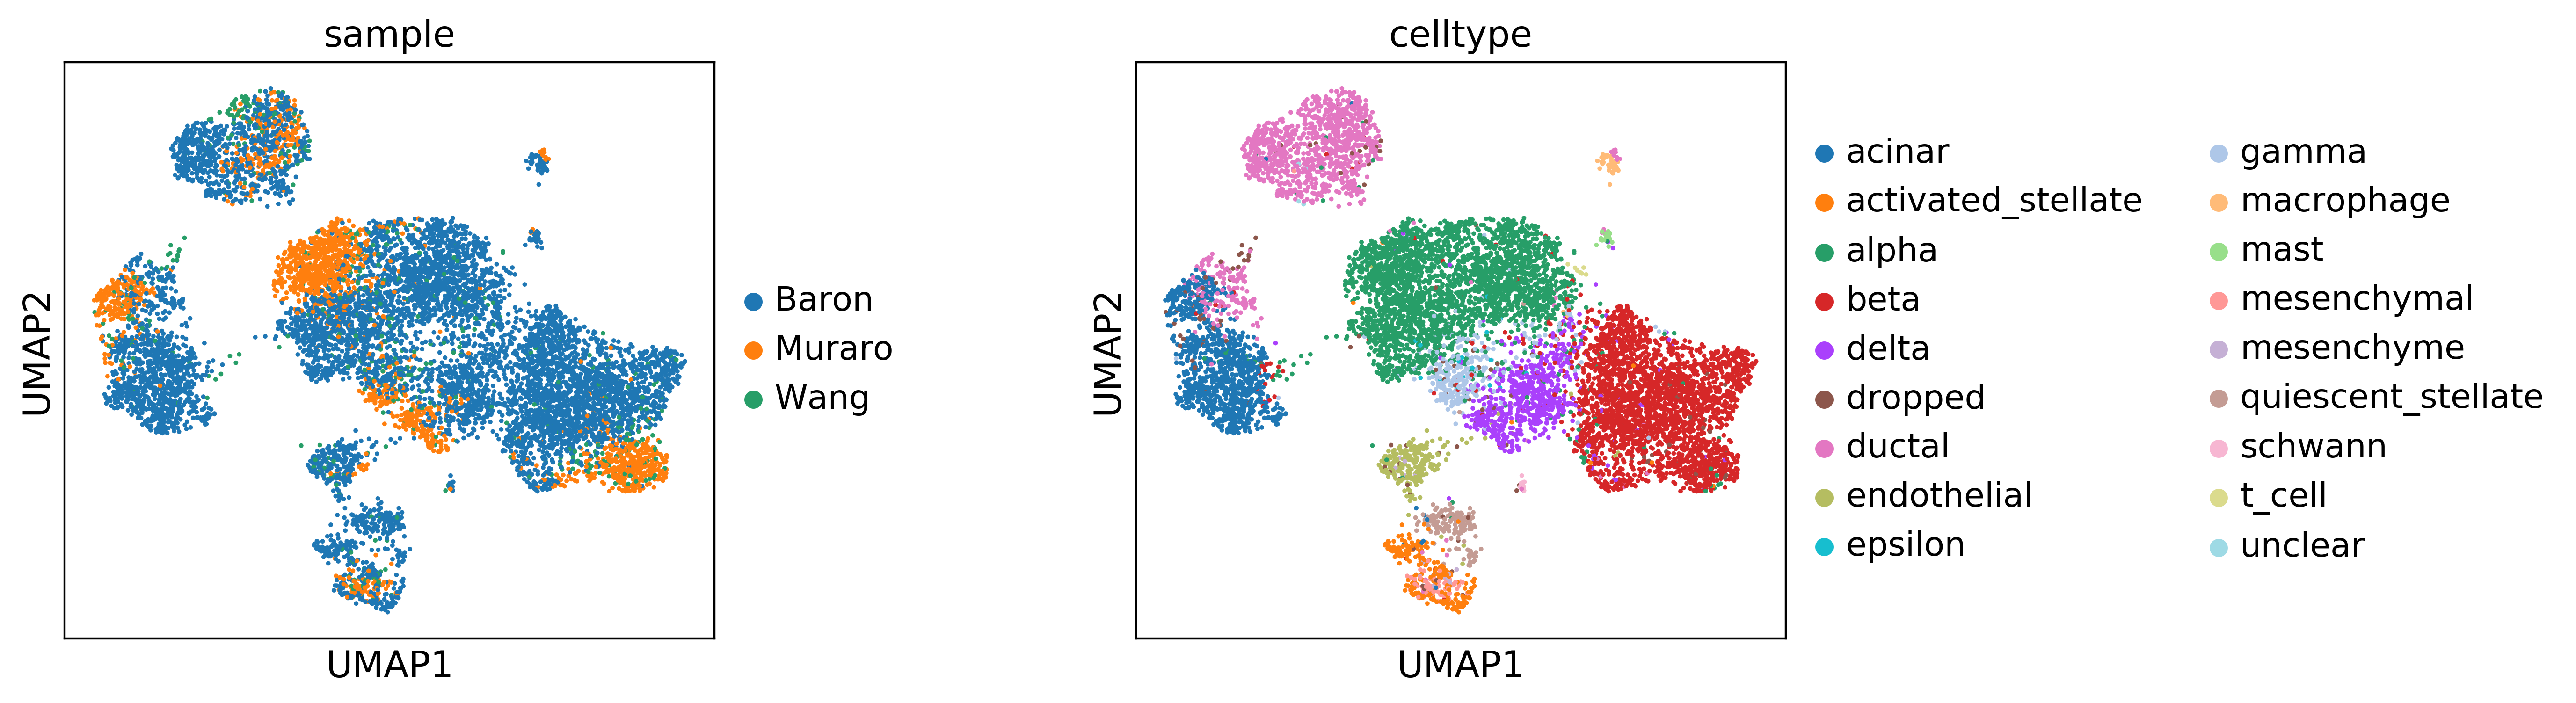

In [33]:
sc.pl.umap(latent_adata, color=[condition_key, cell_type_key], wspace=0.5)

# Perfroming architecture Surgery

In [34]:
new_network = surgeon.operate(network, 
                              new_condition=target_condition,
                              init='Xavier', 
                              freeze=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 2448)         0                                            
__________________________________________________________________________________________________
encoder_labels (InputLayer)     (None, 4)            0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 2452)         0           data[0][0]                       
                                                                 encoder_labels[0][0]             
__________________________________________________________________________________________________
first_layer (Dense)             (None, 512)          1255424     concatenate_3[0][0]              
__________

In [35]:
new_network.condition_encoder

{'Baron': 0, 'Muraro': 1, 'Wang': 2, 'Segerstolpe': 3}

## Train with small new dataset containing out-of-sample condition

In [36]:
train_adata, valid_adata = surgeon.utils.train_test_split(adata_out_of_sample, 0.85)

In [37]:
train_adata.shape, valid_adata.shape

((2858, 2448), (505, 2448))

In [38]:
new_network.train(train_adata,
                  valid_adata, 
                  condition_key=condition_key,
                  le=new_network.condition_encoder, 
                  n_epochs=100,
                  batch_size=128, 
                  early_stop_limit=25,
                  lr_reducer=20, 
                  save=True, 
                  verbose=2)

Train on 2858 samples, validate on 505 samples
Epoch 1/100
 - 1s - loss: 1083.7845 - kl_recon_loss: 1083.7845 - val_loss: 1083.3455 - val_kl_recon_loss: 1083.3455
Epoch 2/100
 - 0s - loss: 1070.3194 - kl_recon_loss: 1070.3194 - val_loss: 1077.3954 - val_kl_recon_loss: 1077.3954
Epoch 3/100
 - 0s - loss: 1064.6094 - kl_recon_loss: 1064.6094 - val_loss: 1073.1115 - val_kl_recon_loss: 1073.1115
Epoch 4/100
 - 0s - loss: 1062.3106 - kl_recon_loss: 1062.3106 - val_loss: 1070.8145 - val_kl_recon_loss: 1070.8145
Epoch 5/100
 - 0s - loss: 1059.5966 - kl_recon_loss: 1059.5966 - val_loss: 1069.2387 - val_kl_recon_loss: 1069.2387
Epoch 6/100
 - 0s - loss: 1057.6339 - kl_recon_loss: 1057.6339 - val_loss: 1068.4489 - val_kl_recon_loss: 1068.4489
Epoch 7/100
 - 0s - loss: 1056.8883 - kl_recon_loss: 1056.8883 - val_loss: 1067.2987 - val_kl_recon_loss: 1067.2987
Epoch 8/100
 - 0s - loss: 1055.7281 - kl_recon_loss: 1055.7281 - val_loss: 1066.7826 - val_kl_recon_loss: 1066.7826
Epoch 9/100
 - 0s - loss:

## Projecting all data in to the latent space of the model 

In [39]:
encoder_labels, _ = surgeon.utils.label_encoder(adata, label_encoder=new_network.condition_encoder, condition_key=condition_key)

In [40]:
adata.obs[condition_key].value_counts()

Baron          8569
Segerstolpe    3363
Muraro         2126
Wang            635
Name: sample, dtype: int64

In [41]:
latent_adata = new_network.to_latent(adata, encoder_labels)
latent_adata

AnnData object with n_obs × n_vars = 14693 × 10 
    obs: 'celltype', 'sample', 'n_genes', 'batch', 'n_counts', 'louvain'

In [42]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

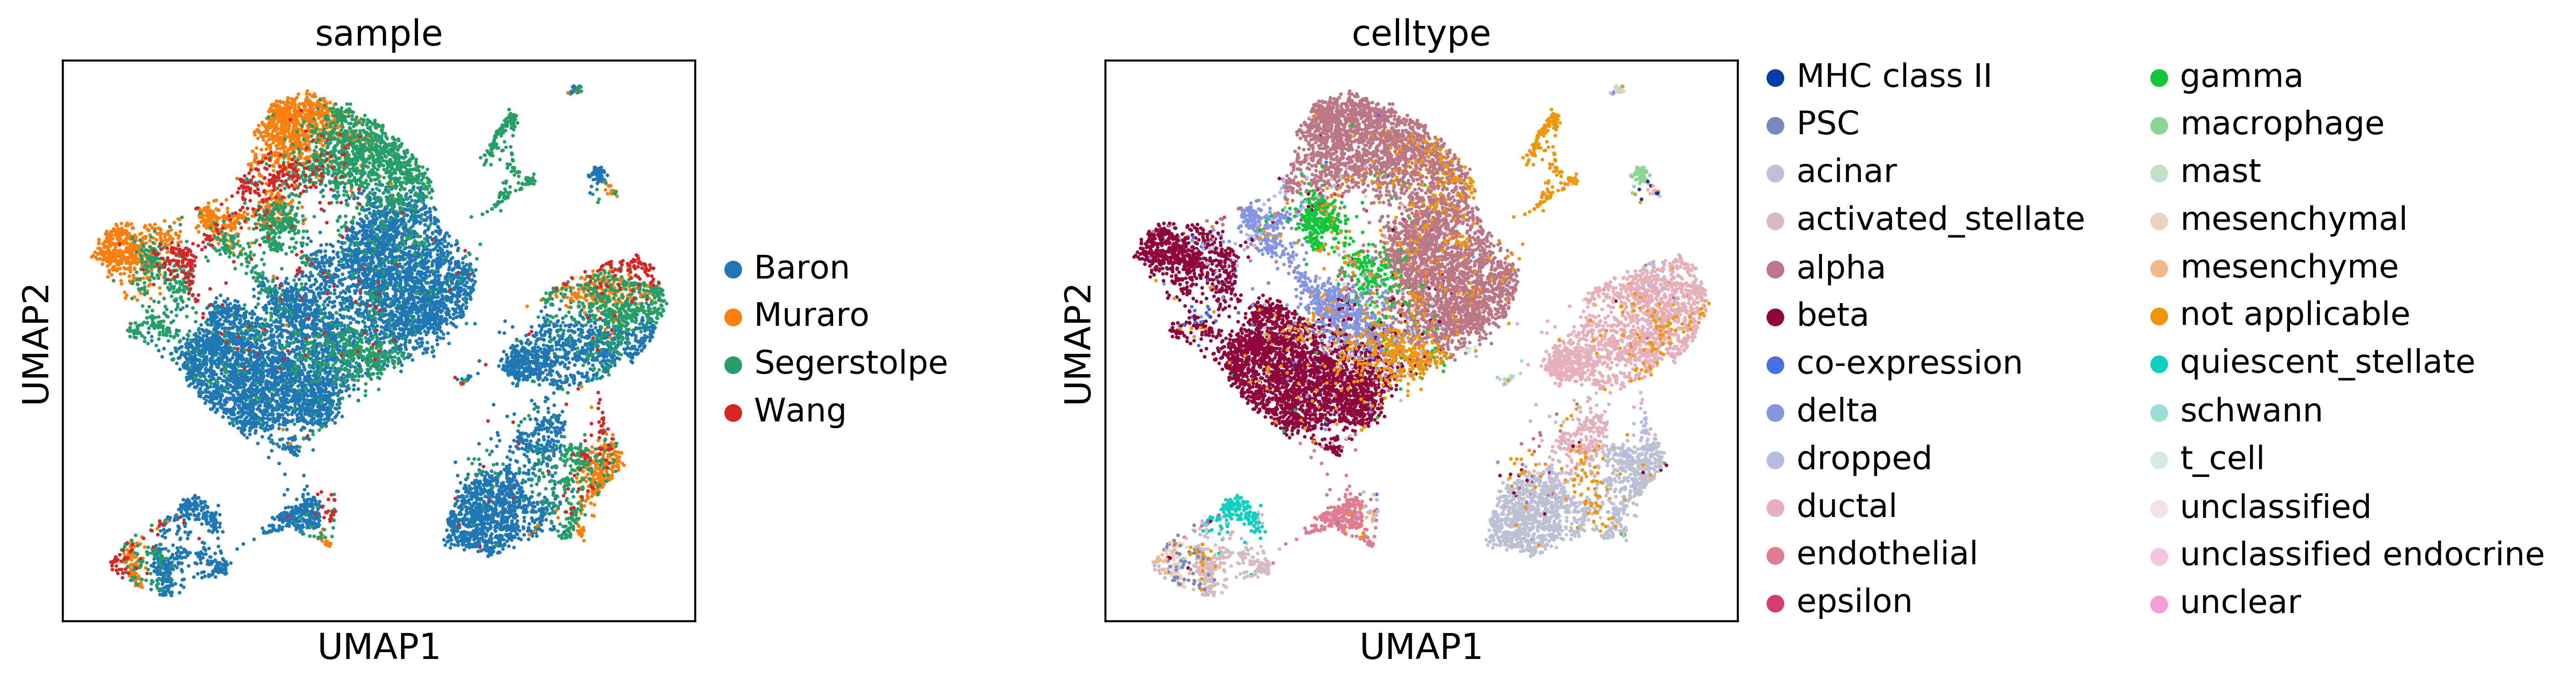

In [43]:
sc.pl.umap(latent_adata, color=[condition_key, cell_type_key], wspace=0.5)